In [1]:
import os
from pathlib import Path
from torchvision import transforms
import torch

In [2]:
from utils import dataloader, engine, save_load
from models import model_builder

c:\Users\gabry\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
base_dir = Path("data/")
train_path = base_dir / 'dataset_1' / 'train'
test_path = base_dir / 'dataset_1'/ 'test'

In [4]:
print("Train path:", train_path)
print("Exists?", os.path.exists(train_path))
print("Contains:", os.listdir(train_path))

Train path: data\dataset_1\train
Exists? True
Contains: ['french_toast', 'garlic_bread']


In [5]:
NUM_EPOCHS = 30
BATCH_SIZE = 32
HIDDEN_UNITS = 64
LEARNING_RATE = 0.0001

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

Using device: cuda


In [7]:
data_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

In [8]:
train_dataloader, test_dataloader, class_names = dataloader.create_dataloaders(
    test_dir=test_path,
    train_dir=train_path,
    transform=data_transform,
    batch_size=BATCH_SIZE,
)

In [9]:
model = model_builder.TinyVGG(
    input_shape=3,
    hidden_units=HIDDEN_UNITS,
    output_shape=len(class_names)
).to(device)

In [10]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=LEARNING_RATE)

In [11]:
history = engine.train(
    model=model,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    loss_fn=loss_fn,
    optimizer=optimizer,
    epochs=NUM_EPOCHS,
    device=device,
)

Training Epochs:   3%|▎         | 1/30 [00:10<05:08, 10.62s/it]

Epoch: 1/30 | Train Loss: 0.6912 | Train Acc: 0.5398 | Test Loss: 0.6938 | Test Acc: 0.4479 |


Training Epochs:   7%|▋         | 2/30 [00:21<04:53, 10.49s/it]

Epoch: 2/30 | Train Loss: 0.6918 | Train Acc: 0.5000 | Test Loss: 0.6971 | Test Acc: 0.4479 |


Training Epochs:  10%|█         | 3/30 [00:32<04:49, 10.73s/it]

Epoch: 3/30 | Train Loss: 0.6869 | Train Acc: 0.5000 | Test Loss: 0.6862 | Test Acc: 0.5445 |


Training Epochs:  13%|█▎        | 4/30 [00:42<04:39, 10.77s/it]

Epoch: 4/30 | Train Loss: 0.6785 | Train Acc: 0.5852 | Test Loss: 0.6765 | Test Acc: 0.6307 |


Training Epochs:  17%|█▋        | 5/30 [00:54<04:36, 11.07s/it]

Epoch: 5/30 | Train Loss: 0.6705 | Train Acc: 0.6420 | Test Loss: 0.6501 | Test Acc: 0.7330 |


Training Epochs:  20%|██        | 6/30 [01:05<04:25, 11.07s/it]

Epoch: 6/30 | Train Loss: 0.6172 | Train Acc: 0.7301 | Test Loss: 0.6977 | Test Acc: 0.5341 |


Training Epochs:  23%|██▎       | 7/30 [01:16<04:12, 11.00s/it]

Epoch: 7/30 | Train Loss: 0.6690 | Train Acc: 0.5795 | Test Loss: 0.5856 | Test Acc: 0.7727 |


Training Epochs:  27%|██▋       | 8/30 [01:26<03:52, 10.57s/it]

Epoch: 8/30 | Train Loss: 0.6208 | Train Acc: 0.6619 | Test Loss: 0.5753 | Test Acc: 0.7775 |


Training Epochs:  30%|███       | 9/30 [01:36<03:39, 10.45s/it]

Epoch: 9/30 | Train Loss: 0.6212 | Train Acc: 0.6392 | Test Loss: 0.5816 | Test Acc: 0.7074 |


Training Epochs:  33%|███▎      | 10/30 [01:46<03:27, 10.39s/it]

Epoch: 10/30 | Train Loss: 0.5661 | Train Acc: 0.7131 | Test Loss: 0.5388 | Test Acc: 0.7888 |


Training Epochs:  37%|███▋      | 11/30 [01:57<03:18, 10.46s/it]

Epoch: 11/30 | Train Loss: 0.5843 | Train Acc: 0.6960 | Test Loss: 0.5331 | Test Acc: 0.7528 |


Training Epochs:  40%|████      | 12/30 [02:07<03:09, 10.54s/it]

Epoch: 12/30 | Train Loss: 0.5371 | Train Acc: 0.7443 | Test Loss: 0.5348 | Test Acc: 0.7225 |


Training Epochs:  43%|████▎     | 13/30 [02:18<02:59, 10.56s/it]

Epoch: 13/30 | Train Loss: 0.6257 | Train Acc: 0.6875 | Test Loss: 0.5001 | Test Acc: 0.7775 |


Training Epochs:  47%|████▋     | 14/30 [02:28<02:45, 10.37s/it]

Epoch: 14/30 | Train Loss: 0.5664 | Train Acc: 0.6903 | Test Loss: 0.5246 | Test Acc: 0.7528 |


Training Epochs:  50%|█████     | 15/30 [02:40<02:43, 10.89s/it]

Epoch: 15/30 | Train Loss: 0.5701 | Train Acc: 0.7159 | Test Loss: 0.5278 | Test Acc: 0.7225 |


Training Epochs:  53%|█████▎    | 16/30 [02:52<02:36, 11.17s/it]

Epoch: 16/30 | Train Loss: 0.5721 | Train Acc: 0.6790 | Test Loss: 0.5073 | Test Acc: 0.7680 |


Training Epochs:  57%|█████▋    | 17/30 [03:05<02:32, 11.70s/it]

Epoch: 17/30 | Train Loss: 0.5049 | Train Acc: 0.7670 | Test Loss: 0.5075 | Test Acc: 0.7737 |


Training Epochs:  60%|██████    | 18/30 [03:15<02:16, 11.34s/it]

Epoch: 18/30 | Train Loss: 0.5772 | Train Acc: 0.6847 | Test Loss: 0.4711 | Test Acc: 0.7737 |


Training Epochs:  63%|██████▎   | 19/30 [03:25<01:59, 10.89s/it]

Epoch: 19/30 | Train Loss: 0.5239 | Train Acc: 0.7386 | Test Loss: 0.4693 | Test Acc: 0.7841 |


Training Epochs:  67%|██████▋   | 20/30 [03:35<01:44, 10.49s/it]

Epoch: 20/30 | Train Loss: 0.4733 | Train Acc: 0.7727 | Test Loss: 0.4621 | Test Acc: 0.7633 |


Training Epochs:  70%|███████   | 21/30 [03:44<01:32, 10.25s/it]

Epoch: 21/30 | Train Loss: 0.4624 | Train Acc: 0.7642 | Test Loss: 0.5298 | Test Acc: 0.7330 |


Training Epochs:  73%|███████▎  | 22/30 [03:54<01:20, 10.07s/it]

Epoch: 22/30 | Train Loss: 0.5111 | Train Acc: 0.7074 | Test Loss: 0.4273 | Test Acc: 0.7727 |


Training Epochs:  77%|███████▋  | 23/30 [04:04<01:09,  9.96s/it]

Epoch: 23/30 | Train Loss: 0.4729 | Train Acc: 0.7443 | Test Loss: 0.4180 | Test Acc: 0.8087 |


Training Epochs:  80%|████████  | 24/30 [04:15<01:01, 10.25s/it]

Epoch: 24/30 | Train Loss: 0.5182 | Train Acc: 0.7557 | Test Loss: 0.5044 | Test Acc: 0.7074 |


Training Epochs:  83%|████████▎ | 25/30 [04:25<00:51, 10.20s/it]

Epoch: 25/30 | Train Loss: 0.5151 | Train Acc: 0.7386 | Test Loss: 0.4783 | Test Acc: 0.7661 |


Training Epochs:  87%|████████▋ | 26/30 [04:34<00:40, 10.03s/it]

Epoch: 26/30 | Train Loss: 0.4651 | Train Acc: 0.7955 | Test Loss: 0.5576 | Test Acc: 0.6922 |


Training Epochs:  90%|█████████ | 27/30 [04:44<00:29,  9.87s/it]

Epoch: 27/30 | Train Loss: 0.4831 | Train Acc: 0.7585 | Test Loss: 0.4664 | Test Acc: 0.7661 |


Training Epochs:  93%|█████████▎| 28/30 [04:53<00:19,  9.81s/it]

Epoch: 28/30 | Train Loss: 0.4461 | Train Acc: 0.8011 | Test Loss: 0.5419 | Test Acc: 0.6922 |


Training Epochs:  97%|█████████▋| 29/30 [05:03<00:09,  9.76s/it]

Epoch: 29/30 | Train Loss: 0.4578 | Train Acc: 0.7756 | Test Loss: 0.4471 | Test Acc: 0.7973 |


Training Epochs: 100%|██████████| 30/30 [05:14<00:00, 10.47s/it]

Epoch: 30/30 | Train Loss: 0.4979 | Train Acc: 0.7841 | Test Loss: 0.5028 | Test Acc: 0.7178 |


In [12]:
save_load.save_model(model=model,
                 target_dir="models",
                 model_name="tiny_vgg_model_1.pth")

[INFO] Saving model to: models\tiny_vgg_model_1.pth


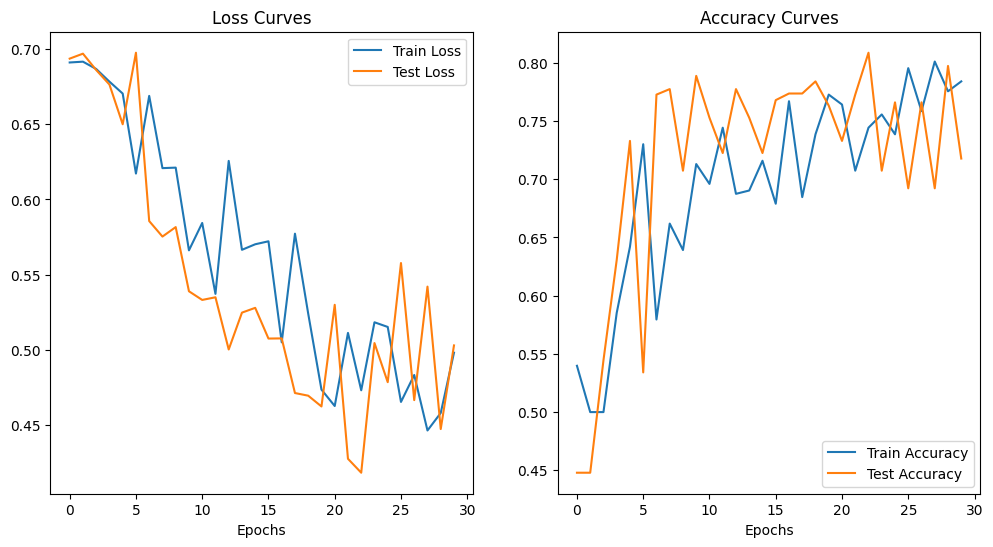

In [13]:
from utils.plots import plot_loss_curves

plot_loss_curves(history)

In [ ]:
from utils.plots import evaluate_model
evaluate_model(model, test_dataloader, class_names, device)

ImportError: cannot import name 'evaluate_model' from 'utils.plots' (c:\Users\gabry\OneDrive\Pulpit\Own Projects\portfolioProjects\projekt2\bread_classifier\utils\plots.py)